In [1]:
import pickle
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from time import time
from IPython.display import Image
from tqdm.notebook import tqdm

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

X_train = train_df.drop(['y'], axis =1 ).values

Y_train = train_df.y.values

In [3]:
class LabelEncoderExt(object):
    
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it mode of classes,
        Mode of a value in class will be added in fit and transform will take care of new item.
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        
        
        self.label_encoder = self.label_encoder.fit(list(data_list) ) #+ ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to mode class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        mode = stats.mode(new_data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = [mode.mode[0] if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

### Function to Predict : : final_func_1 ( X ) 


#### Requirements:

    1. TruncSVD 
    Path :: 'Fitted_Object/trunc_SVD.sav' 
    Contains Truncated_SVD Object fitted on train Data
    
    2. PCA
    Path :: 'Fitted_Object/PCA_obj.sav'
    Contains PCA Object fitted on train data
    
    3. Categorical Encoding
    Path :: 'Fitted_Object/enc_obj_dict.sav'
    Contains objected which is mapped on trained data
    
    4. Best_Model 
    Path :: 'Fitted_Object/best_model_regressor.sav'
    Contains Decision Tree Regressor
    
    5. Dictionary
    Path :: 'Fitted_Object/unikValue_feat.sav'
    Contains Uniqvalue in integer features as Key as colums list as value.


### These are files are imported in "final_finc_1".

In [4]:
def final_func_1(train_df):
    
    """
    
    Input :: DataFrame of DataPoints/DataPoint with shape (No. of data points, 377) in case of one datapoint use
    
             array.reshape(1, -1)
    
    Output :: Array of Predicted Value 
    
    Requirements
    
    1. TruncSVD 
    Path :: 'Fitted_Object/trunc_SVD.sav' 
    Contains Truncated_SVD Object fitted on train Data
    
    2. PCA
    Path :: 'Fitted_Object/PCA_obj.sav'
    Contains PCA Object fitted on train data
    
    3. Categorical Encoding
    Path :: 'Fitted_Object/enc_obj_dict.sav'
    Contains objected which is mapped on trained data
    
    4. Best_Model 
    Path :: 'Fitted_Object/best_model_regressor.sav'
    Contains Decision Tree Regressor
    
    5. Dictionary
    Path :: 'Fitted_Object/unikValue_feat.sav'
    Contains Uniqvalue in integer features as Key and columns list as value.
    
    
    """
    
    
    start = time()
    ## path of the files
    
    SVD_Filename = 'Fitted_Object/trunc_SVD.sav'

    PCA_Filename = 'Fitted_Object/PCA_obj.sav'

    enc_cat_obj = 'Fitted_Object/enc_obj_dict.sav'

    base_filename = 'Fitted_Object/best_model_regressor.sav'

    uniqvalue_filename = 'Fitted_Object/unikValue_feat.sav'
    
    column_filename = 'Fitted_Object/column_mapping.sav'
    
    ## importing files

    column_array = pickle.load(open(column_filename, 'rb'))

    uniq_value_feat_dict = pickle.load(open(uniqvalue_filename, 'rb'))

    Trunc_SVD = pickle.load(open(SVD_Filename, 'rb'))

    PCA_obj = pickle.load(open(PCA_Filename, 'rb'))

    enc_obj_dict = pickle.load(open(enc_cat_obj,'rb'))

    best_model = pickle.load(open(base_filename,'rb'))
    
    ## columns which contains zeros as the only category
    
    zero_value_feat = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
    
    ## columns which contains categorical variables which needs to be encoded

    cat_feat = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
    
    ## columns that needs to be dropped from DataFrame
    column_to_drop = zero_value_feat + ['ID']

    ## columns which contains 0's and 1's as categories 
    decompos_col = uniq_value_feat_dict['[0, 1]']
    
    
    ##  if input is np.ndarray or list or list of list
    
    if isinstance(train_df,(list,np.ndarray)):# and isinstance(train_df[0],):
        ## create dataframe with the columns and numpy data
        X_data = pd.DataFrame(data = train_df, columns=column_array)
     
        X_data = X_data.drop(column_to_drop, axis=1)

    
    ## if input is dataframe drop columns and store in X_data
    
    if isinstance(train_df,pd.DataFrame):
    
        X_data = train_df.drop(column_to_drop,axis =1)
    
    ## encoding the categorical features
    
    for ele in cat_feat:  X_data[ele] = enc_obj_dict[ele].transform(X_data[ele]) 
        
    ## decomposition of features    
    trunc_SVD_data = Trunc_SVD.transform(X_data[decompos_col])
    
    PCA_data = PCA_obj.transform(X_data[decompos_col])

    ## adding the decompose features
    for i in range(1, 5 + 1):

        X_data['tsvd_' + str(i)] = trunc_SVD_data[:, i - 1]

        X_data['pca_' + str(i)] = PCA_data[:, i - 1]
    
    
    print('Time for Preprocessing and Featursiation is :: {}  sec' .format(time() - start))
    
    now = time()
    
    ## predicting the preprocessed and featurised variables
    
    Y_pred = best_model.predict(X_data)
    
    print('Time for inference is :: {}  sec' .format(time() - now))
    
    return Y_pred

### Input list of list 

In [5]:
lst = [0, 'k', 'v', 'at', 'a', 'd', 'u', 'j', 'o', 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0]

lst_of_lst = [lst]

In [6]:
final_func_1(lst_of_lst)

Time for Preprocessing and Featursiation is :: 0.07825016975402832  sec
Time for inference is :: 0.0018010139465332031  sec


array([94.43566745])

### Input array Single datapoint

In [7]:
X_train[0]

array([0, 'k', 'v', 'at', 'a', 'd', 'u', 'j', 'o', 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
final_func_1(X_train[0].reshape(1, - 1))

Time for Preprocessing and Featursiation is :: 0.027216672897338867  sec
Time for inference is :: 0.0017240047454833984  sec


array([94.43566745])

### Input batch of datapoints

In [9]:
final_func_1(X_train)

Time for Preprocessing and Featursiation is :: 0.23520755767822266  sec
Time for inference is :: 0.07050299644470215  sec


array([ 94.43566745,  94.43566745,  78.29702703, ..., 110.9961236 ,
        94.43566745,  94.43566745])

### Function to Calculate R2_score : : final_func_2 (X,  Y)

In [10]:
def final_func_2(X, Y):
    
    """
    Input :: X (Features), Y (Target Values)
    
    Output :: R2_score
    
    """
    
    return r2_score(Y,final_func_1(X))

In [11]:
Y_pred = final_func_1(X_train)

Time for Preprocessing and Featursiation is :: 0.18879127502441406  sec
Time for inference is :: 0.05010485649108887  sec


In [12]:
r2_score_  = final_func_2(X_train, Y_train)

Time for Preprocessing and Featursiation is :: 0.2387678623199463  sec
Time for inference is :: 0.04932665824890137  sec


In [13]:
print("The r2_score is :: ",r2_score_)

The r2_score is ::  0.5584789194723387


In [14]:
Y_pred_test = final_func_1(test_df.values)

Time for Preprocessing and Featursiation is :: 0.2394084930419922  sec
Time for inference is :: 0.05136871337890625  sec


In [15]:
y_final = pd.read_csv('sample_submission.csv').drop('y',axis=1)

y_final['y'] = Y_pred_test

y_final.to_csv('Submission_Final.csv', index= False)

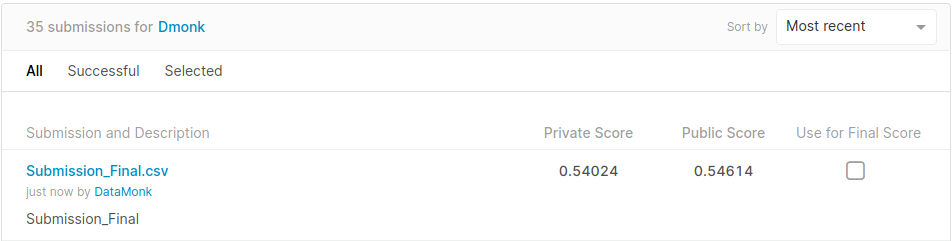

In [16]:
Image(filename = "img/Final_Submission.png" ,width = 1000 , height = 1000 )